<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%9A%D0%9F_%E2%84%962_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%91%D0%A1_25_%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 2: Кластерний аналіз методом к-середніх
### Дисципліна: Вступ до Інтелектуального Аналізу Даних



Аль Хмуз Карина Бассамівна БС-25

##Завдання:

1. Реалізувати кластеризацію у вигляді функції. В якості метрики відстані використовувати квадрат відстані Евкліда.
2. Провести кластерний аналіз з розбиттям на 3, 4 та кластерів на  даних.
3. Візуалізувати результати кластеризації.
4. Реалізувати розрахунок коефіцієнту «силуету». Визначити найбільш вірогідне (точне) розбиття за даною метрикою.
5. Зробити висновки про теоретичну оптимальну кількісті кластерів.

##Вихідні дані:
Я, Аль Хмуз Карина Бассамівна, маю перший варіант в своїй групі БС-25, тому:

1.	Вибір даних для кластеризації– 30 значень
2.	 Початок даних: 36
3.	Кінець даних: 65
4.	Внутрішньокластерна відстань для 3-7 кластерів. Розраховується як середня відстань між центом кластера та всіма точками, що були включені до даного кластеру.
5.	Міжкластерна відстань для 3-7 кластерів. Розраховується як середня відстань між центом кластера та всіма точками, що були включені до одного іншого кластеру. Міжкластерна відстань розраховується попарно для двох кластерів.                                  
    

##Вимоги:
1.	Теоретичні дані (до 1 ст.)
2.	Візуалізацію результатів кластеризації для 3, 4 та 5 кластерів.
3.	Результати розрахунку коефіцієнту «силуету» для кожного варіанту розбиття.
4.	Висновки про теоретичну оптимальну кількісті кластерів.


##Теоретичний матеріал:


***Кластеризація (кластерний аналіз)*** — це статистична процедура, задача якої полягає в розбитті вибірки об'єктів на підмножини, що не перетинаються і називаються кластерами. Кожен кластер має складається зі схожих об'єктів, а об'єкти різних кластерів мають істотно відрізнятися один від одного.

 Методи кластеризації відрізняюся припущеннями про вид залежності при відношенні до кластерів (форма кластеру), застосованими мірами схожості, правилами формування кластеру. Наприклад, зараз розглянемо метод k-середніх.


***Метод k-середніх*** є широко використовуваним методом кластеризації, який прагне мінімізувати середню квадратичну відстань між точками в одному кластері. Незважаючи на те, що він не гарантує абсолютної точності, його простота і швидкість це компенсують.

Перевагою методу k-середніх є те, що він більш зручний для кластеризації великої кількості спостережень, а недоліком можна відзначити те, що він чутливий до викидів, які можуть викривити середнє значення, та той факт, що кількість кластерів (що і являє тут собою k) має бути визначена спеціалістом заздалегідь.

Для оцінки якості кластеризації можна використовувати коефіцієнт “силуету”, який показує, наскільки добре об'єкти вписуються у свої кластери. Цей коефіцієнт обчислюється для кожного об'єкта як відношення різниці між середньою відстанню до об'єктів свого кластера і середньою відстанню до найближчого сусіднього кластера. Значення коефіцієнту варіюється від -1 до 1, де значення ближче до 1 свідчать про добре сформовані кластери, значення близько до 0 вказують на те, що об'єкт розташований на межі між двома кластерами, а від'ємні значення означають, що об'єкт може бути віднесений до іншого кластеру.


##Практична частина:

###Імпорт бібліотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

###Завантаження файлу Excel

In [3]:
uploaded = files.upload()
file_path = 'prostate.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')


Saving prostate.xlsx to prostate.xlsx
Saving ПЗ №3.docx to ПЗ №3.docx


###Вибір змінних Rx, sbp, sg з потрібним діапазоном рядків

In [4]:
data_in_range = data[['rx', 'sbp', 'sg']].iloc[36:66].reset_index(drop=True)

###Закодування текстових значень у стовпці 'rx' за допомогою Label Encoding

Оскільки стовпець Rx містить текстові значення, такі як "5.0 mg estrogen" і "placebo", які неможливо масштабувати або кластеризувати напряму. Потрібно закодувати ці текстові значення в числові, перш ніж проводити кластерний аналіз. Можна використати, наприклад, Label Encoding:

In [5]:
label_encoder = LabelEncoder()
data_in_range['rx'] = label_encoder.fit_transform(data_in_range['rx'])

###Заповнення NaN значень середнім значенням у кожному стовпці

У даних є пропущені значення (NaN), які необхідно заповнити або видалити перед виконанням кластерного аналізу. Можна скористатися методом заповнення пропущених значень, щоб обробити NaN, або видалити рядки з такими значеннями.

Я обрала метод заповнення середнім значенням для кожного стовпця:

In [6]:
data_in_range = data_in_range.fillna(data_in_range.mean())

###Стандартизуємо дані для кластеризації

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_in_range)

###Функція для кластерного аналізу з візуалізацією

In [8]:
def analiz_clasteriv(data, cluster_range=(3, 4, 5)):
    silhouette_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Візуалізація
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='Set1', s=100, alpha=0.7, label='Clusters')

        # Додаємо центроїди з маркером 'X' для кращої видимості
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

        # Підписуємо осі
        plt.xlabel("Перша змінна (нормалізована)")
        plt.ylabel("Друга змінна (нормалізована)")

        # Додаємо коефіцієнт силуету у назву графіка
        plt.title(f'Кластерний аналіз методом K-Means (k={n_clusters}), Силует: {silhouette_avg:.2f}')

        # Додаємо легенду та кольорову шкалу для кластерів
        plt.legend()
        plt.colorbar(scatter, label='Cluster Labels')

        plt.grid(True)  # Додаємо сітку для зручності
        plt.show()


    return silhouette_scores

###Запуск функції аналізу кластерів

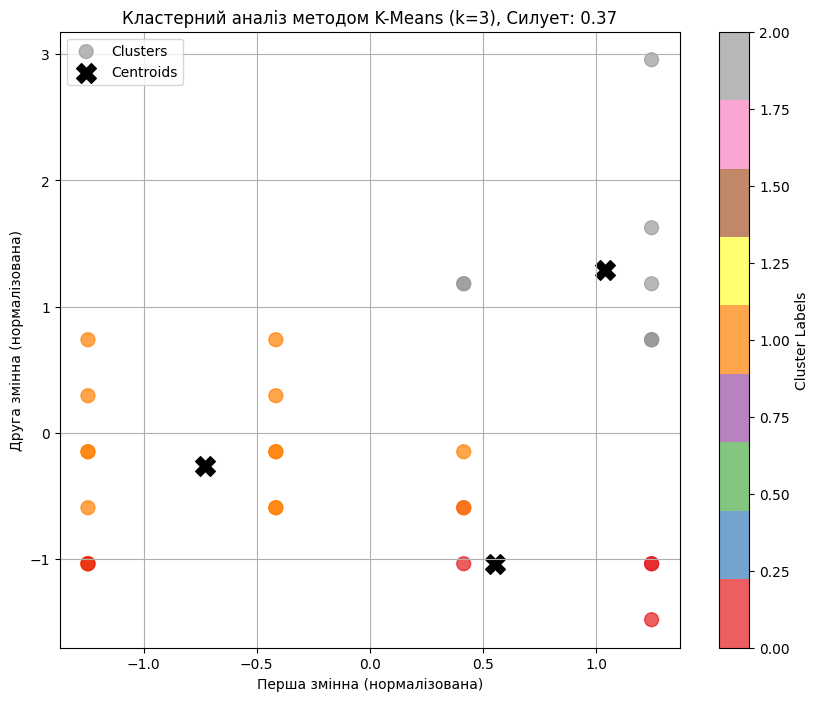

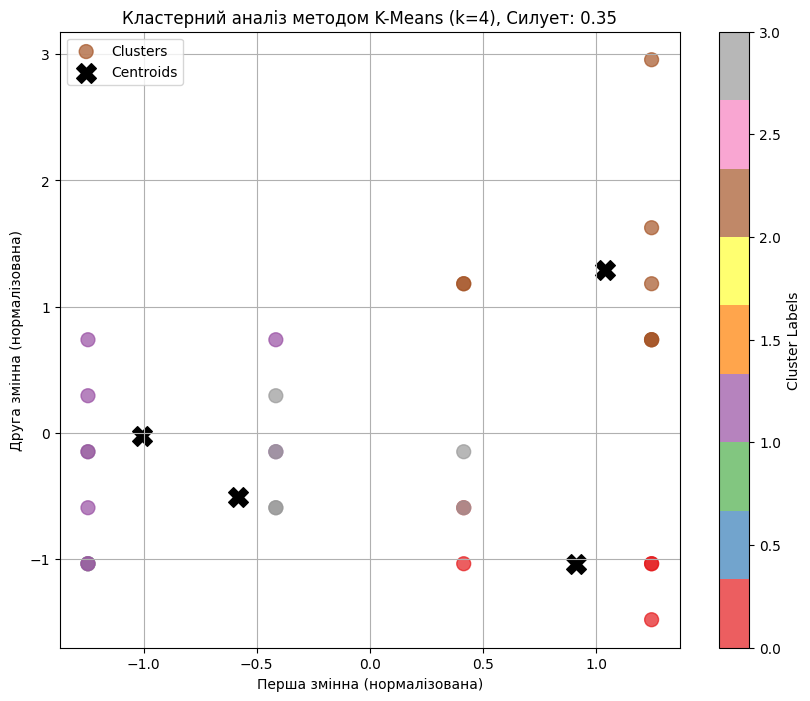

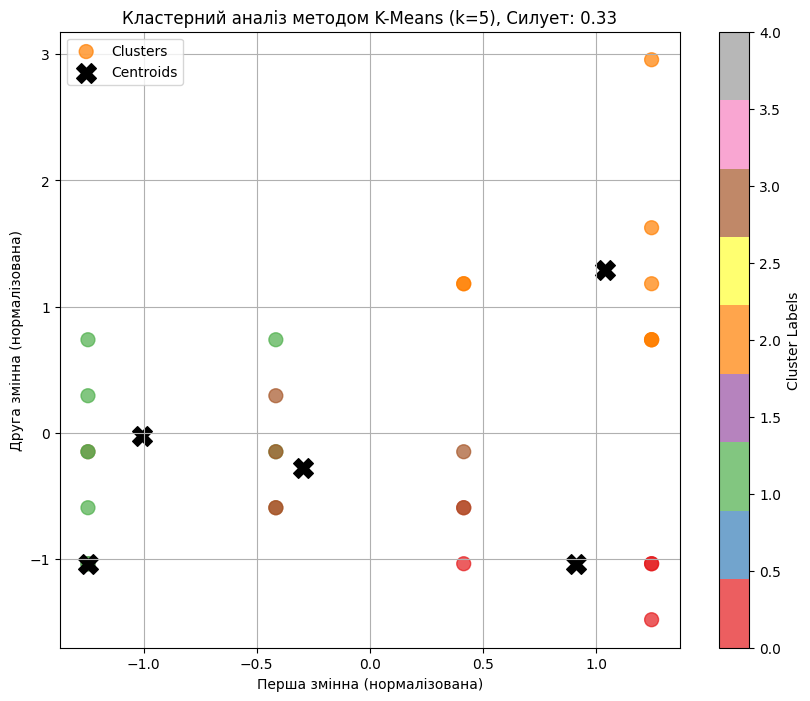

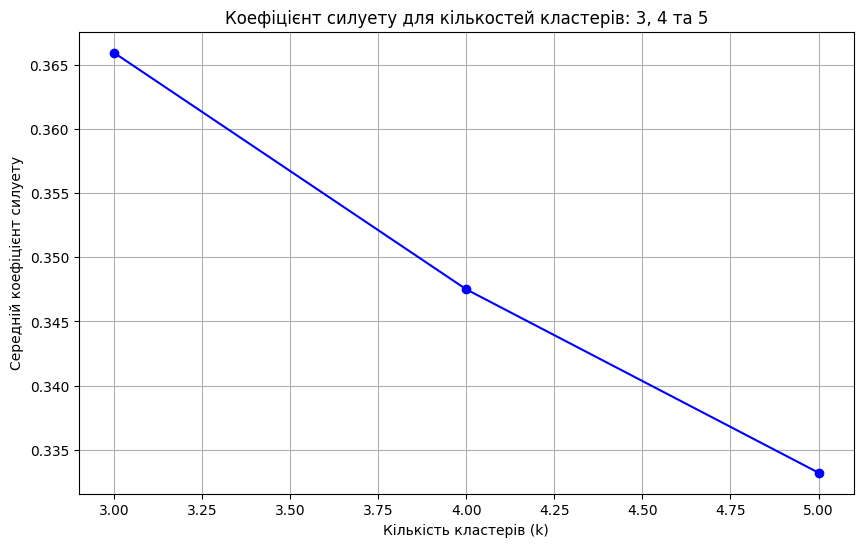

Оптимальна кількість кластерів: 3 із коефіцієнтом силуету 0.37


In [9]:
# Встановлюємо діапазон кластерів
cluster_range = [3, 4, 5]

# Запускаємо функцію для аналізу кластерів тільки з 3, 4 та 5 кластерами
scores = analiz_clasteriv(data_scaled, cluster_range)

# Графік коефіцієнтів силуету для 3, 4 і 5 кластерів
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, scores, marker='o', linestyle='-', color='blue')
plt.title('Коефіцієнт силуету для кількостей кластерів: 3, 4 та 5')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Середній коефіцієнт силуету')
plt.grid(True)
plt.show()

# Знаходимо оптимальне розбиття серед значень 3, 4 і 5
optimal_clusters = cluster_range[np.argmax(scores)]
print(f"Оптимальна кількість кластерів: {optimal_clusters} із коефіцієнтом силуету {max(scores):.2f}")


###Опис Графіків Кластерного Аналізу

***Кластерний Аналіз (Метод K-Means):***

На кожному графіку відображено результати кластеризації даних методом K-Means для різної кількості кластерів (k = 3, 4, 5).
Графіки показують, як дані розподілені по двом основним змінним, які були нормалізовані для забезпечення коректного порівняння.


***Кластерні Точки:***

Кожна точка на графіку представляє окремий спостережуваний об'єкт (зразок) з набору даних.
Точки кольорові, що вказує на їх належність до певного кластера. Кольори визначаються за допомогою колірної карти 'Set1', яка дозволяє легко розрізняти різні кластери.

***Центроїди Кластерів:***

На графіках також представлені чорні маркери у формі 'X', які позначають центроїди кожного з кластерів. **Центроїди** — це середні значення всіх точок у кластері, що вказують на його "центр".

***Коефіцієнт Силуету:***

У заголовку кожного графіка вказується коефіцієнт силуету для відповідної кількості кластерів. Це значення характеризує, наскільки добре кластеризовані точки, де високі значення (близько до 1) свідчать про хорошу кластеризацію, а значення близько до 0 вказують на переплетення кластерів.

***Легенда та Кольорова Шкала:***

Графік містить легенду, що пояснює, які кольори відповідають яким кластерам, а також кольорову шкалу, що надає додаткову інформацію про кластерні мітки.


##**Виправлена помилка❗❗❗❗❗❗❗❗**

Звичайно, зрозуміло, чому двовимірна візуалізація може бути недостатньою. У двовимірному графіку ми можемо побачити лише розташування точок щодо двох обраних змінних, але це обмежує розуміння структури даних, особливо якщо у нас є більше вимірів (змінних). У такому випадку ми бачимо лише "пласке" зображення, яке не відображає повної картини щодо відстаней між точками в просторі.

Коли ми переходимо до тривимірної візуалізації, ми можемо використовувати третю змінну, що додає об’ємність і допомагає краще оцінити реальні відстані між кластерами. Це дозволяє більш точно побачити, як розташовані точки відносно одна одної у просторі. Тривимірне зображення може виявити, наприклад, що деякі точки, які здавалися "близькими" на двовимірному графіку, насправді є далекими, якщо врахувати третій вимір. Також можна побачити форму та щільність кластерів, що часто важливо для оцінки якості кластеризації.

Тобто основна причина, чому нам потрібна тривимірна візуалізація, – це бажання отримати більш об'ємне уявлення про дані, що допоможе точніше зрозуміти структуру кластерів і прийняти рішення щодо їх оптимальної кількості.

Така тривимірна візуалізація особливо корисна у випадках, коли дані мають складну багатовимірну природу, і перехід до трьох вимірів стає ефективним компромісом між простотою відображення та точністю інтерпретації.

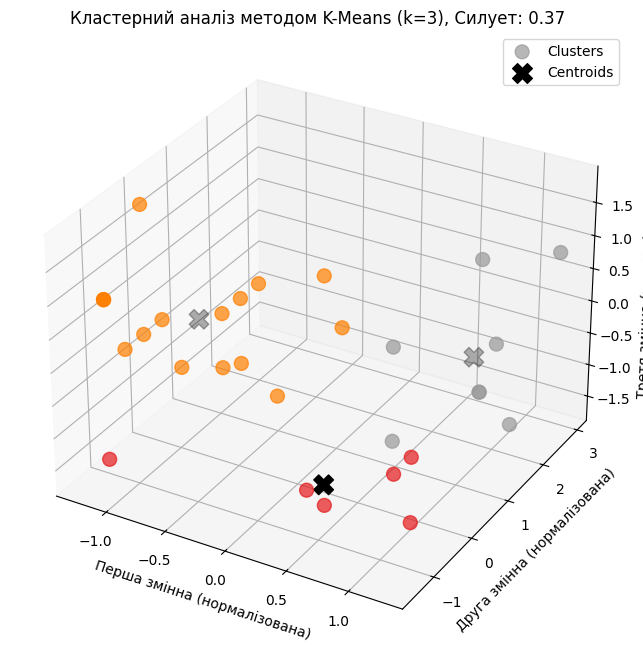

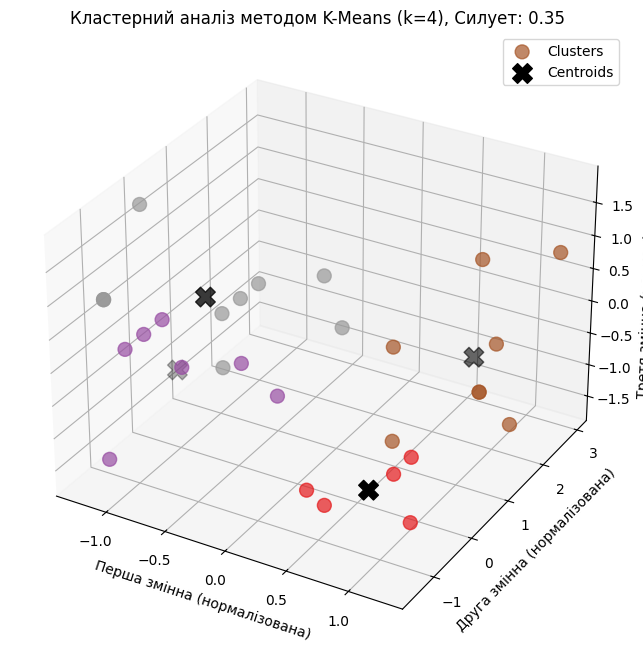

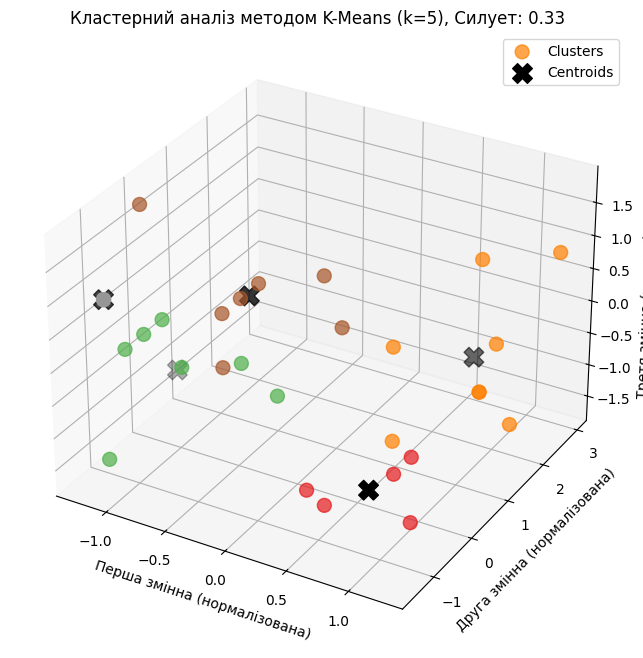

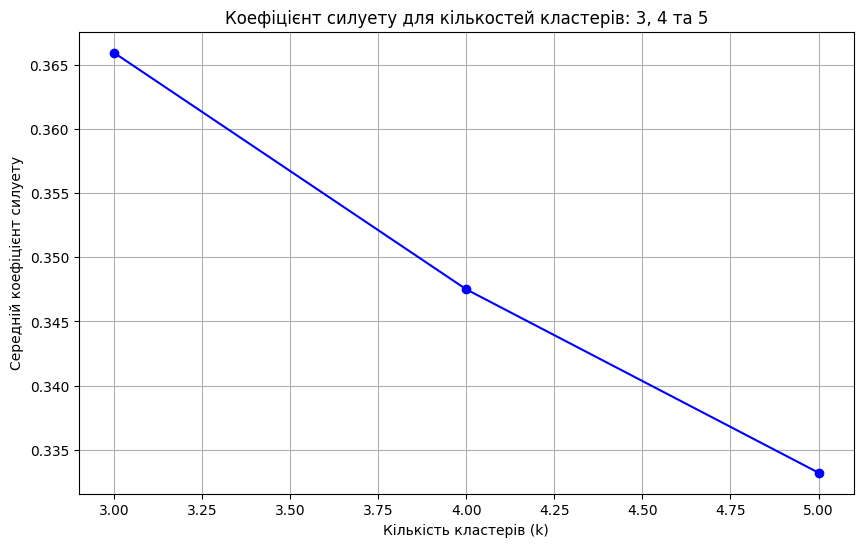

Оптимальна кількість кластерів: 3 із коефіцієнтом силуету 0.37


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def analiz_clasteriv(data, cluster_range=(3, 4, 5)):
    silhouette_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Тривимірна візуалізація
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_labels, cmap='Set1', s=100, alpha=0.7, label='Clusters')

        # Додаємо центроїди
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', marker='X', label='Centroids')

        # Підписуємо осі
        ax.set_xlabel("Перша змінна (нормалізована)")
        ax.set_ylabel("Друга змінна (нормалізована)")
        ax.set_zlabel("Третя змінна (нормалізована)")

        # Додаємо коефіцієнт силуету у назву графіка
        plt.title(f'Кластерний аналіз методом K-Means (k={n_clusters}), Силует: {silhouette_avg:.2f}')

        # Додаємо легенду
        ax.legend()
        plt.show()

    return silhouette_scores

# Приклад виклику функції (при наявності 3 параметрів у data_scaled)
cluster_range = [3, 4, 5]
scores = analiz_clasteriv(data_scaled, cluster_range)

# Графік коефіцієнтів силуету
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, scores, marker='o', linestyle='-', color='blue')
plt.title('Коефіцієнт силуету для кількостей кластерів: 3, 4 та 5')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Середній коефіцієнт силуету')
plt.grid(True)
plt.show()

# Знаходимо оптимальне розбиття
optimal_clusters = cluster_range[np.argmax(scores)]
print(f"Оптимальна кількість кластерів: {optimal_clusters} із коефіцієнтом силуету {max(scores):.2f}")


###Невеличке пояснення графіків:

Для кожної кількості кластерів (
𝑘 = 3, 𝑘 = 4, 𝑘 = 5) програма будує тривимірний графік, де:

Точки позначають спостереження (об’єкти), і кожен кластер має свій колір.

Центроїди кластерів (центральні точки кожного кластеру) позначені великими чорними маркерами ("X").

Осі відповідають трьом змінним нашого набору даних. Ми бачимо розташування кожного кластера по відношенню до цих змінних.

Таким чином, ми можемо побачити форму, розташування і щільність кластерів. Це дає змогу оцінити, наскільки близько кластери розташовані один до одного і чи існує значне перекриття між ними.

**Чому тривимірна візуалізація є значно кращою порівняно з двовимірною?**

Тривимірна візуалізація справді допомагає краще зрозуміти структуру кластерів. У двовимірному графіку різні кластери можуть перекриватися через недостатнє врахування третьої змінної, що може ввести в оману щодо відстаней і чітких меж між ними. В таких випадках точки з різних кластерів можуть виглядати як один кластер або навпаки — точки в межах одного кластеру можуть здаватися розділеними.

У тривимірному просторі ми маємо третю вісь, яка додає об’ємність та глибину. Це дозволяє нам краще бачити:

Розташування точок відносно одна одної — тепер можна чітко побачити, як об'єкти групуються у просторі.

Відстані між кластерами — у тривимірному графіку ми краще бачимо, чи є кластери дійсно відокремленими один від одного, чи існує певне перекриття.

Структуру кожного кластеру — видно не лише відтінки кольорів, а й об’ємність кожного кластеру, що дозволяє більш об'єктивно оцінити, наскільки тісно згруповані дані всередині кластеру.

Отже, тривимірна візуалізація надає більш повне уявлення про структуру даних, ніж двовимірний графік, що значно знижує ризик помилкового тлумачення результатів кластеризації.

##Загальні висновки

Оптимальна Кількість Кластерів: Після проведення кластерного аналізу методом K-Means було визначено, що оптимальна кількість кластерів становить 3. Це значення було обрано на основі аналізу коефіцієнта силуету.

Коефіцієнт Силуету: Для 3 кластерів середній коефіцієнт силуету склав 0.37. Це вказує на те, що дані в цих кластерах мають помірну ступінь скупченості. Значення близько до 0.5 вважається задовільним, а значення вище 0.7 свідчить про хорошу якість кластеризації.

Візуалізація: Графіки кластерів продемонстрували чітке розділення між кластерами, що підтверджує правильність вибору 3 кластерів. Кластери на графіках показують різні групи даних, які мають схожі характеристики.

Аналіз Результатів: Виходячи з отриманих результатів, можна стверджувати, що кластеризація на 3 групи є доцільною для нашого набору даних. Це дозволяє спростити подальший аналіз і зрозуміти структуру даних.

###ДОДАТОК А

Ваш текст виглядає добре, але я б рекомендував внести кілька змін для покращення ясності та граматики. Ось відредагована версія:

---

Я вирішила створити цей додатковий код для кластерного аналізу, щоб експериментувати з інтерактивними графіками. Це дозволяє користувачу самостійно переглядати графіки з різних кутів, що робить візуалізацію даних більш динамічною та зручною для аналізу. На превеликий жаль, ці графіки можна буде побачити тільки в Google Colab, але ось вам невеличка інструкція:

1. У верхній частині цього документа буде посилання на мій Google Colab (помаранчевим кольором). Вам потрібно натиснути на нього, і ви перейдете в інше середовище.
2. Так як це Google Colab, спочатку потрібно натиснути зліва зверху на "Середа виконання" -> "Виконати все".
3. Оскільки це Google Colab, потрібно буде помістити документ `prostate` з моїми даними в одне місце (для зручності я прикріплю цей документ Excel у Classroom, і нижче я додам фото, куди саме потрібно буде перетягнути цей файл 😃).
4. Вітаю! Сподіваюсь, що помилок не буде, і ви зможете побачити ці інтерактивні графіки (можете переглядати їх з усіх боків за допомогою правої кнопки миші).

Сподіваюсь, вам сподобається! :)


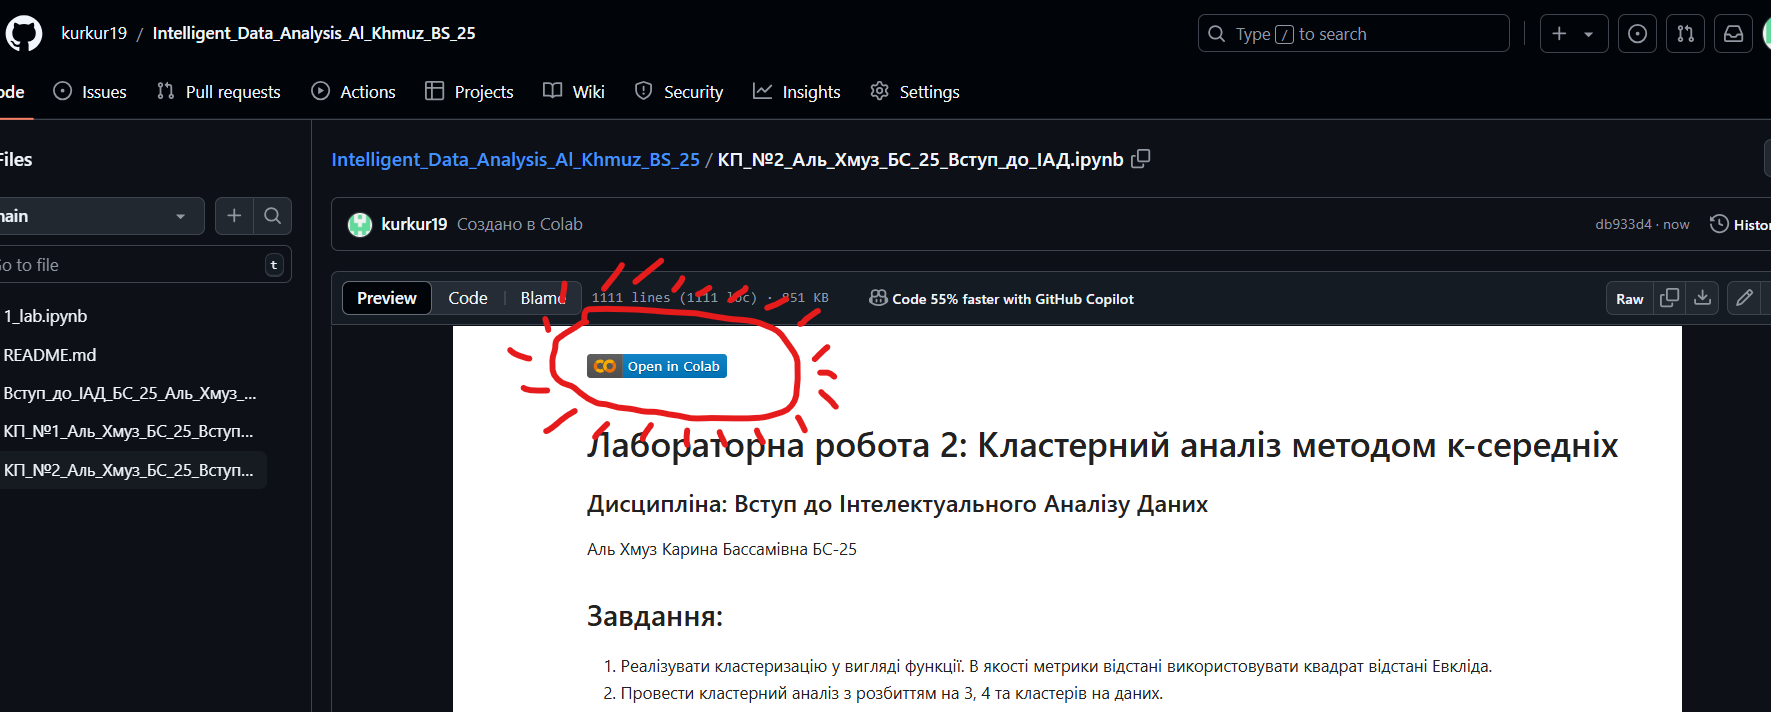

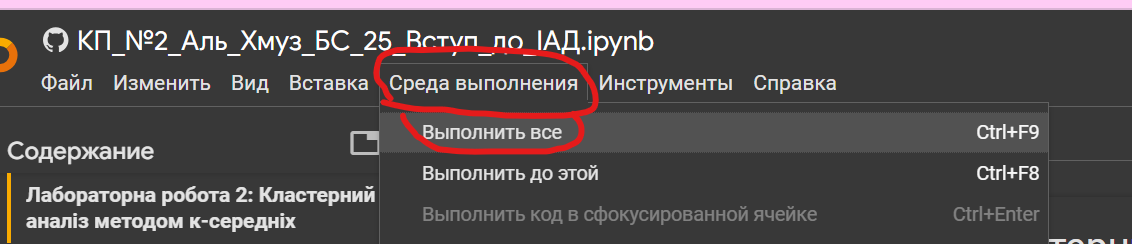

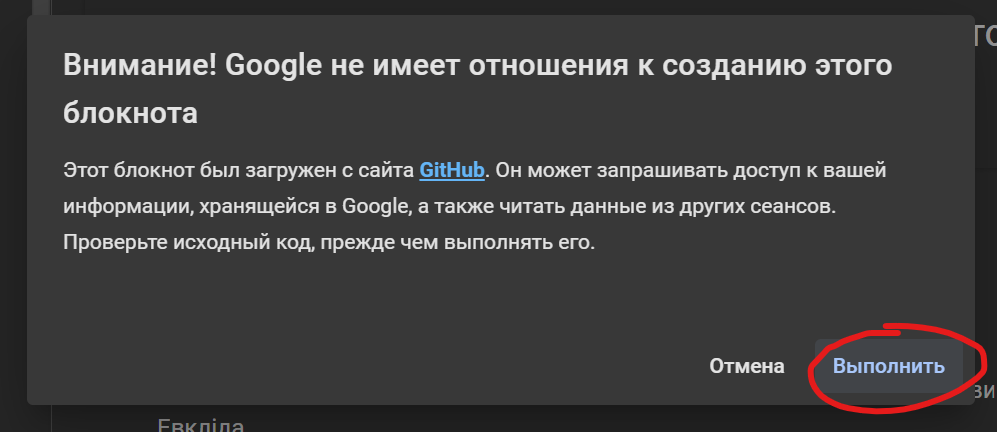

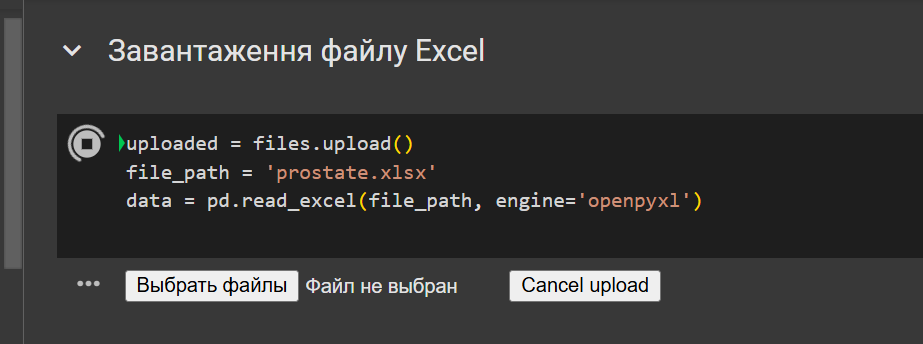

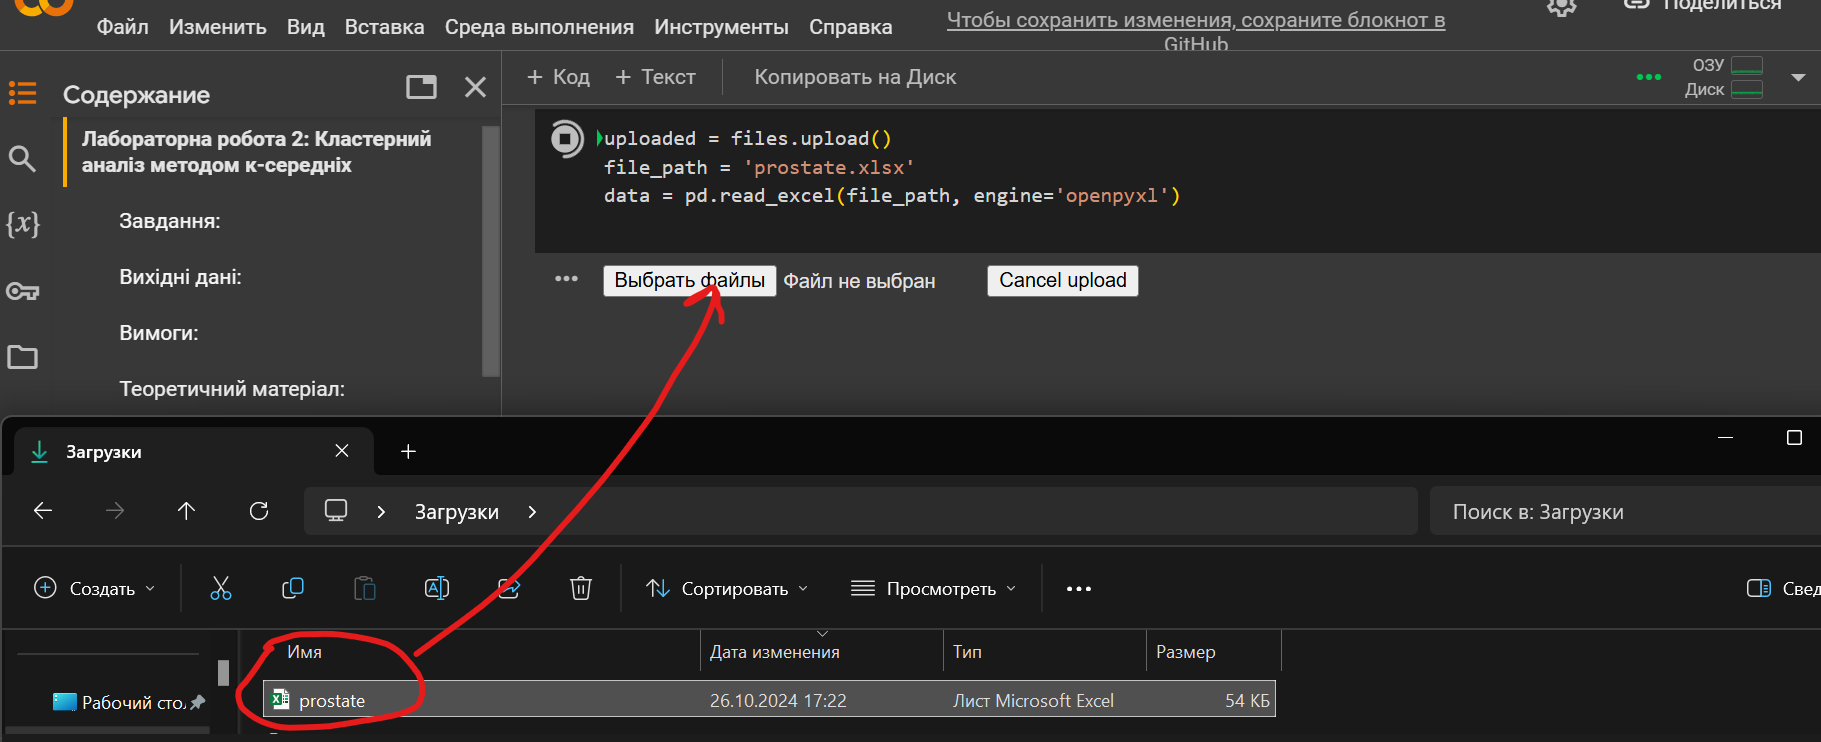

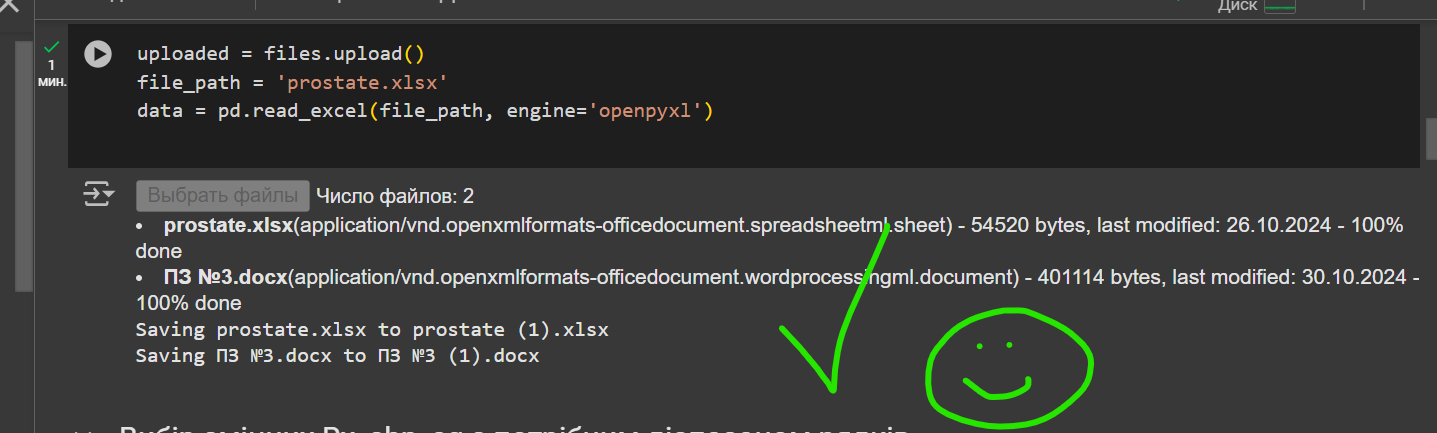

Далі потрібно прогорнути до самого низу, і там ви знайдете ці графіки (їх можна крутити, наближати та віддаляти):

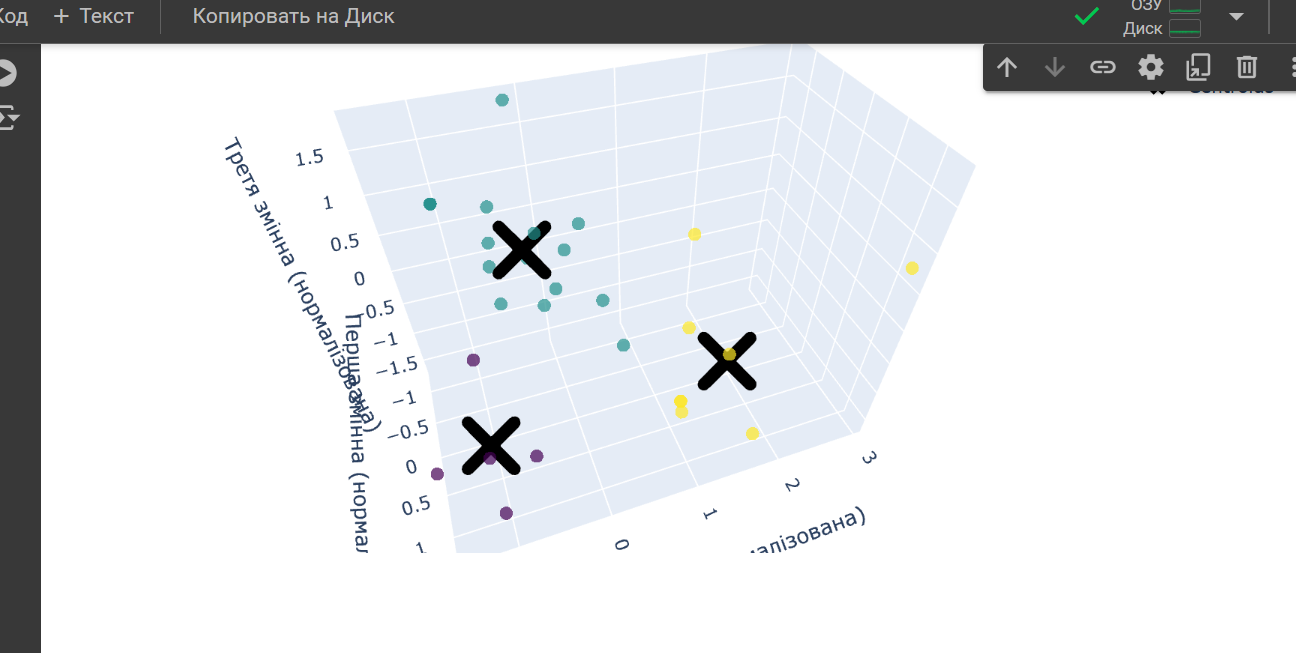

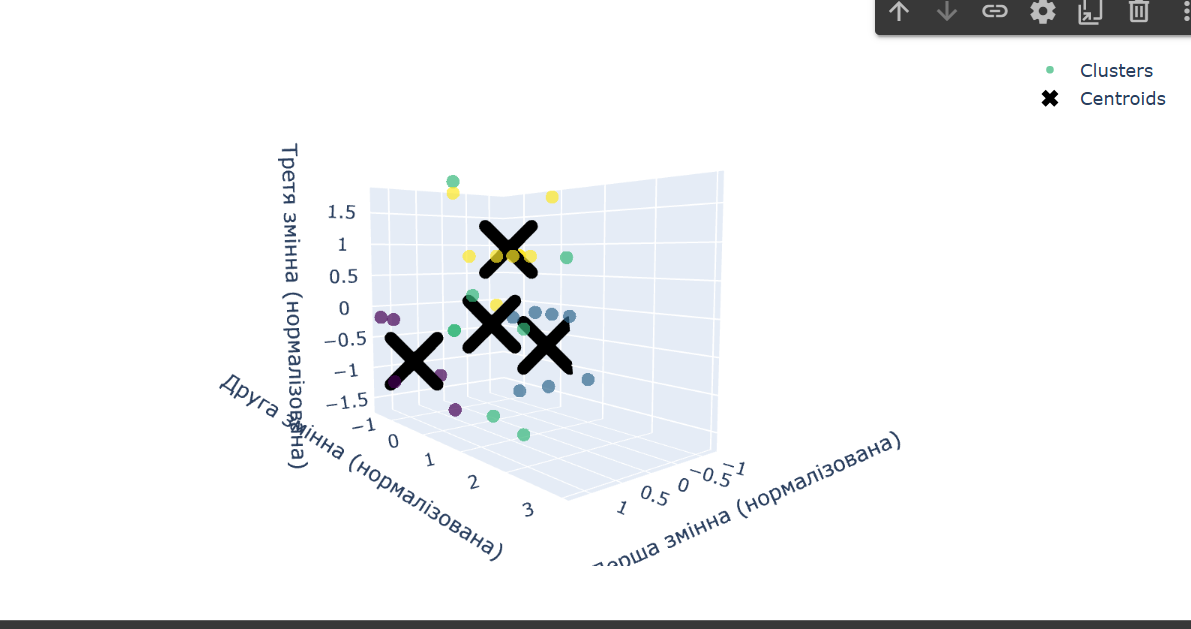

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

def analiz_clasteriv(data, cluster_range=(3, 4, 5)):
    silhouette_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Тривимірна інтерактивна візуалізація з Plotly
        fig = go.Figure()

        # Додаємо точки кластерів
        fig.add_trace(go.Scatter3d(
            x=data[:, 0], y=data[:, 1], z=data[:, 2],
            mode='markers',
            marker=dict(size=5, color=cluster_labels, colorscale='Viridis', opacity=0.7),
            name='Clusters'
        ))

        # Додаємо центроїди
        fig.add_trace(go.Scatter3d(
            x=kmeans.cluster_centers_[:, 0],
            y=kmeans.cluster_centers_[:, 1],
            z=kmeans.cluster_centers_[:, 2],
            mode='markers',
            marker=dict(size=10, color='black', symbol='x'),
            name='Centroids'
        ))

        # Налаштування вигляду графіка
        fig.update_layout(
            title=f'Кластерний аналіз методом K-Means (k={n_clusters}), Силует: {silhouette_avg:.2f}',
            scene=dict(
                xaxis_title='Перша змінна (нормалізована)',
                yaxis_title='Друга змінна (нормалізована)',
                zaxis_title='Третя змінна (нормалізована)',
            )
        )

        # Відображаємо інтерактивний графік
        fig.show()

    return silhouette_scores

# Приклад виклику функції (при наявності 3 параметрів у data_scaled)
cluster_range = [3, 4, 5]
scores = analiz_clasteriv(data_scaled, cluster_range)
